In [22]:
import pandas as pd
import seaborn as sns
import json
import numpy as np
import os
import folium
from folium import plugins
from matplotlib import pyplot as plt
# from geopy import distance
import datetime as dt

#each separate data table
FoodAndDrink = pd.read_csv('Business.csv')
Business = pd.read_csv('Business.csv')
Users = pd.read_csv('Users.csv')
Reviews = pd.read_csv('Reviews.csv')

#function for building an analytical set by joining all files 
def AnalyticalSet(df1, df1on, df3on, rfilename, ufilename):
    df = pd.read_csv(rfilename)
    df = df1.merge(df, on=df1on, how='left')
    df = df.merge(pd.read_csv(ufilename), on=df3on, how='left')
    return df

#the analytical set
FoodAndDrink = AnalyticalSet(df1=FoodAndDrink, 
                                df1on='business_id', df3on='user_id',rfilename='Reviews.csv',
                                ufilename='Users.csv'
                            )

#remove potentially unneeded columns
FoodAndDrink.drop(['Unnamed: 0_x','Unnamed: 0_y', 'compliment_hot' ,'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos' ], inplace=True, axis=1)


Reviews['date'] = pd.to_datetime(Reviews.date)
FoodAndDrink['date']= pd.to_datetime(FoodAndDrink.date)

# Businesses

In [15]:
f = folium.Figure(width=1600, height=1000)
m = folium.Map(location= [41, -95], tiles="openstreetmap",
zoom_start=5).add_to(f)
folium.plugins.HeatMap(Business[['latitude', 'longitude', 'review_count']].values.tolist()).add_to(m)
m

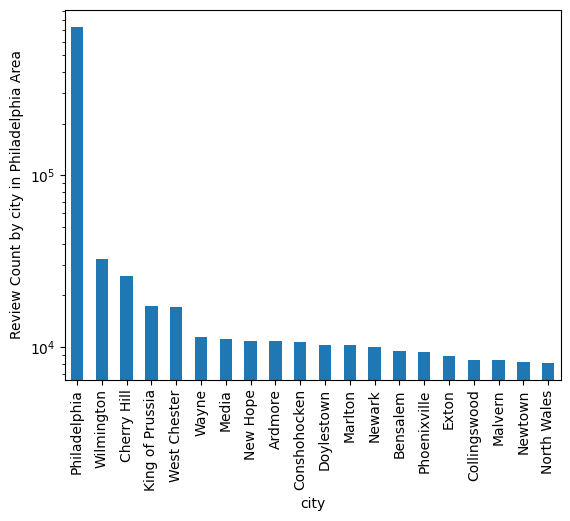

In [12]:
Business.groupby('city').sum('review_count').sort_values(by='review_count', ascending=False).head(20).review_count.plot.bar()
plt.ylabel('Review Count by city in Philadelphia Area')
plt.yscale('log')

#this is maybe including reviews not in the analytical set as it's a sum for the business data.

Text(0.5, 1.0, '# Reviews left for Food and Drink Businesses in Philadelphia Area')

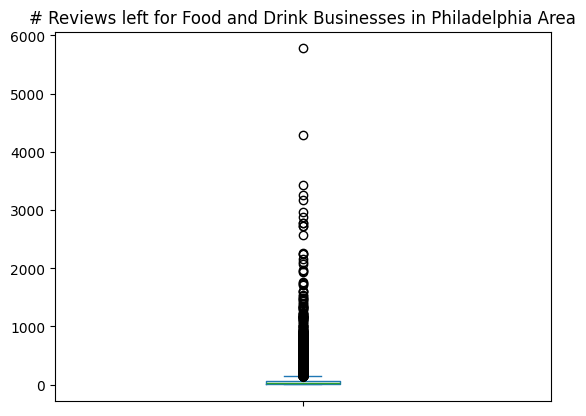

In [13]:
BusinessReviewCount = FoodAndDrink.groupby(['business_id', 'longitude', 'latitude']).size().sort_values(ascending=False)
BusinessReviewCount.plot.box()
plt.title("# Reviews left for Food and Drink Businesses in Philadelphia Area")

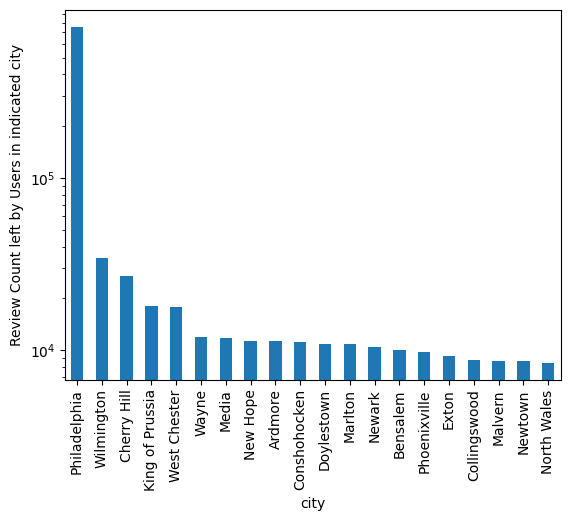

In [15]:
BusinessReviewCount = FoodAndDrink.groupby(['city']).size().sort_values(ascending=False).head(20)
BusinessReviewCount.plot.bar()
plt.ylabel('Review Count left by Users in indicated city')
plt.yscale('log')
#validates the review count is correct at the business level

# Users

In [6]:
## This plot is useless it shows all businesses
# Users.review_count.plot.box()
# plt.ylabel('# of Reviews for all businesses each reviewer')


Text(0, 0.5, 'Frequency of Review Count (log scale)')

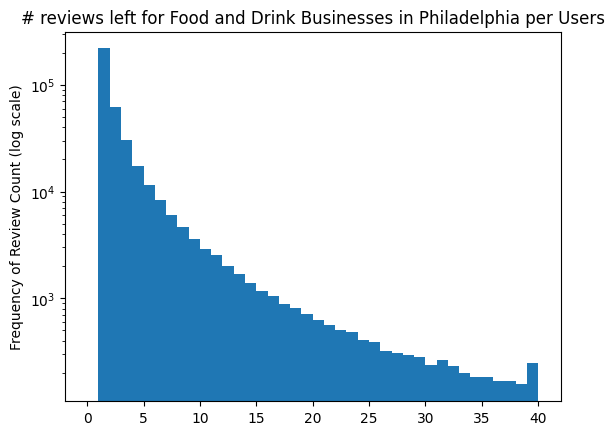

In [5]:
Reviews.groupby('user_id')['text'].count().plot.hist(bins=40, range=[0, 40])
plt.title('# reviews left for Food and Drink Businesses in Philadelphia per Users')
plt.yscale('log')
plt.ylabel('Frequency of Review Count (log scale)')

Text(0.5, 0, '# reviews left for Food and Drink Businesses in Philadelphia per User')

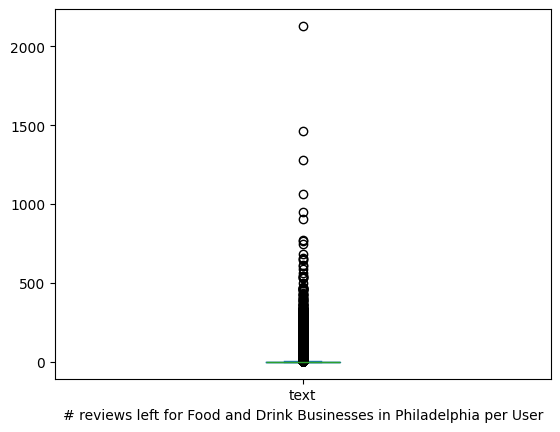

In [6]:
Reviews.groupby('user_id')['text'].count().plot.box()
plt.xlabel('# reviews left for Food and Drink Businesses in Philadelphia per User')

Text(0.5, 0, 'Date')

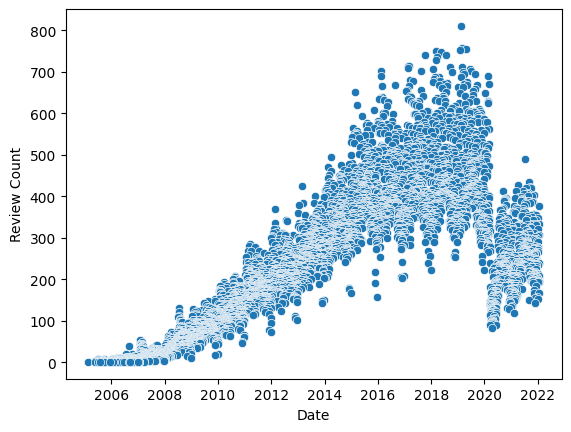

In [27]:
Reviewct = Reviews.date.value_counts() #these are timestamps so maybe evaluate grouping by user and dropping that user if they are spamming reviews!
Reviews['date_only'] = Reviews['date'].dt.date
ReviewDayct = Reviews.date_only.value_counts()
sns.scatterplot(ReviewDayct)
plt.ylabel('Review Count')
plt.xlabel('Date')


# Code Graveyard

## Read and Clean

In [8]:


# bdatafilepath = "./Dataset/json/yelp_academic_dataset_business.json"
# cdatafilepath = "./Dataset/json/yelp_academic_dataset_checkin.json"
# rdatafilepath = "./Dataset/json/yelp_academic_dataset_review.json"
# udatafilepath = "./Dataset/json/yelp_academic_dataset_user.json"



# businesscats = ['restaurant', 'coffee', 'bars', 'food', 'drinks', 'cafes']

# usercols = ["user_id", "name", "review_count", "yelping_since",
#         "useful", "funny", "cool", "elite", "fans", "average_stars",
#         "compliment_hot", "compliment_more", "compliment_profile", 
#         "compliment_cute", "compliment_list", "compliment_note", 
#         "compliment_plain", "compliment_cool", "compliment_funny",
#         "compliment_writer", "compliment_photos"]

# reviewcols = ["review_id", "user_id", "business_id", "stars", "useful",
#                "funny", "cool", "text", "date"]

# phillylat = 39.9526
# phillylong = -75.1652

## Read Business

In [9]:
# def SelectRestaurants(filepath, colname, selectlist):
#     alldata = pd.read_json(filepath, lines=True)
#     alldata.dropna(subset=[colname], inplace=True)
#     alldata[colname] = alldata[colname].str.lower()
#     finalDF = pd.DataFrame()
#     for i in selectlist:
#         tempdf = alldata[alldata[colname].str.contains(i)]
#         finalDF = pd.concat([finalDF,tempdf], ignore_index=True, axis=0)
#     finalDF = finalDF.drop_duplicates(subset=['business_id'])
#     return finalDF

# FoodAndDrink = SelectRestaurants(filepath=bdatafilepath, colname='categories', selectlist=businesscats)
# FoodAndDrink['PhiDistance'] = FoodAndDrink.apply(lambda x: distance.distance((x['latitude'],x['longitude']),(phillylat,phillylong)).miles, axis=1)

# FoodAndDrink = FoodAndDrink[FoodAndDrink.PhiDistance <50]
# attrs = pd.json_normalize(FoodAndDrink['attributes'])
# extractcols= ['RestaurantsDelivery','RestaurantsReservations', 'RestaurantsTakeOut', 'DriveThru', 'RestaurantsTableService',  'RestaurantsCounterService', 'OutdoorSeating',  'Alcohol', 'Ambience', 'RestaurantsAttire', 'BusinessParking']
# attrs = attrs[extractcols]

# FDcols = FoodAndDrink.columns.tolist() 
# acols = attrs.columns.tolist()
# for a in acols:
#     FDcols.append(a)
# FoodAndDrink.drop(['hours', 'attributes'], inplace=True,axis=1)

# FoodAndDrink.to_csv("Business.csv")

# df1 = attrs.describe(include = 'all')

# df1.loc['dtype'] = attrs.dtypes
# df1.loc['size'] = len(attrs)
# df1.loc['% count'] = attrs.isnull().mean()
# df1

# ID_Biz = FoodAndDrink.business_id.tolist()

## Users

In [10]:
#function to get the users. there are excess users now that we've filtered to Philly

# def ReturnUserData(filename, collist, ureviews):
#     userdata = []


#     with open(filename, encoding='latin-1') as f:
#         for line in f:
#             doc = json.loads(line)
#             lst =[]
#             for i in collist:
#                 lst.append(doc[i])
#             userdata.append(lst)
#     Udata = pd.DataFrame(data=userdata, columns=collist)
#     Udata[Udata['user_id'].isin(ureviews)]
#     return Udata

# Users = ReturnUserData(udatafilepath, usercols, UidReviews)

# Users = Users[Users.user_id.isin(BidRs)]
# Users.to_csv("Users.csv")


## Filter reviews

In [11]:
## This was the filtering func for the user reviews - don't run on a local machine will take >2hrs

# def FilterBizReviews(bizids, filename):
#     Rdata = []
#     with open(filename, encoding='latin-1') as f:
#         for line in f:
#             doc = json.loads(line)
#             # print("line is", doc)
#             # lst =[]
#             if doc['business_id'] not in bizids:
#                 pass
#             else:
#                 Rdata.append(doc
#     Rdata = pd.DataFrame(data=Rdata, columns=reviewcols)
#     return Rdata

# UserReviews = FilterBizReviews(bizids=ID_Biz, filename= rdatafilepath)

# UserReviews.to_csv("Reviews.csv")

# UidReviews = Reviews.user_id.tolist()
